In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import seaborn as sns
sns.set()
from matplotlib import style
style.use('seaborn-talk')

## Assume the planet appears to move linearly:

### Intersectional Area as a function of time:
$$ x = vt\\
d(x) = \sqrt{v^2t^2+b^2} \\
g(x) = \frac{d^2+R_p^2-R_s^2}{2R_pd} \\
h(x) = \frac{d^2+R_s^2-R_p^2}{2R_sd} $$

$$
A(x) = \left\{
\begin{array}{ll}
      R_p^2\left(\cos(g(x))-g(x)\sqrt{1-g(x)^2}\right)+R_s^2\left(\cos(h(x))-h(x)\sqrt{1-h(x)^2}\right) & (R_s-R_p\leq d \leq R_s+R_p)\: \& \: (-R_s-R_p\leq d\leq R_p-R_s) \\
      \pi R_p^2 & R_p-R_s \leq d \leq R_s-R_p \\
      0 & Else \\
\end{array} 
\right. $$

In [2]:
def intersectional_area(v,t,R_s,R_p,b): #Find the intersectional area; formulae derived using basic geometry
    d = np.sqrt(v**2*t**2+b**2)
    g = (d**2+R_p**2-R_s**2)/(2*R_p*d)
    h = (d**2+R_s**2-R_p**2)/(2*R_s*d)
    
    if (R_s-R_p<=d) and (d<=R_s+R_p):
        return R_p**2*(np.arccos(g)-g*np.sqrt(1-g**2))+R_s**2*(np.arccos(h)-h*np.sqrt(1-h**2))
    elif (-R_s-R_p<=d) and (d<=R_p-R_s):
        return R_p**2*(np.arccos(g)-g*np.sqrt(1-g**2))+R_s**2*(np.arccos(h)-h*np.sqrt(1-h**2))
    elif (R_p-R_s<=d) and (d<=R_s-R_p):
        return np.pi*R_p**2
    else:
        return 0

### Test with Artificial Values:

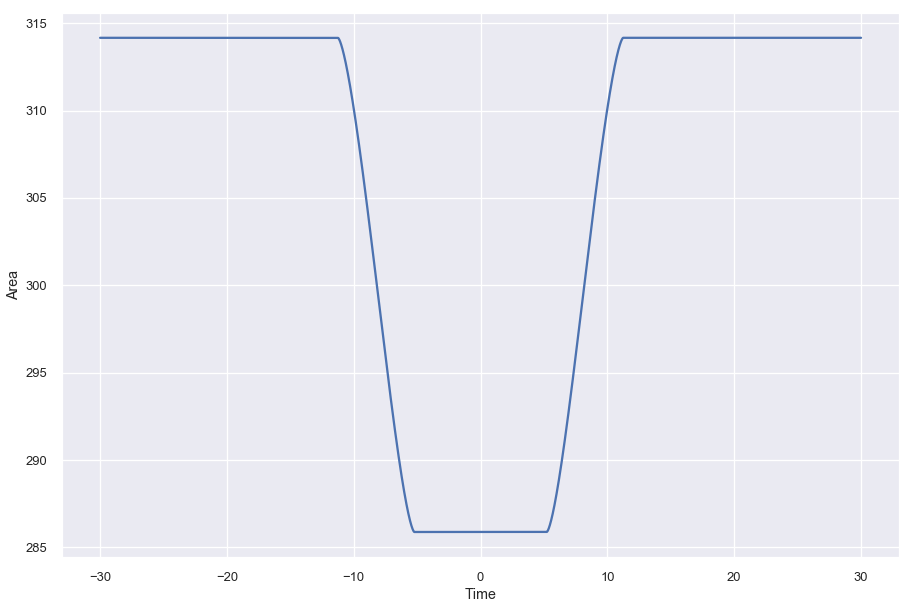

In [3]:
t1 = np.linspace(-30,30,10000)
area = np.array([])

for temp in t1:
    area = np.append(area,intersectional_area(1.1,temp,10,3,4))


plt.figure(figsize=(15,10))
plt.plot(t1,np.pi*100-area)
plt.xlabel('Time')
plt.ylabel('Area')
plt.show()

### Test with Actual Values:

In [4]:
#Subscript: s = star, p = planet
G = 6.673e-11
R_s = 696340000 #parameter
M_s = 1.989e30 #parameter
a = 778000000000 #parameter
R_p = 69911000 #parameter
i = 0.99995*np.pi/2 #parameter- t_T and t_F exist only for i close to pi/2

b = a*np.cos(i)/R_s
delta = (R_p/R_s)**2

P = 2*np.pi*np.sqrt(a**3/(G*M_s)) #Kepler's Third Law
v = np.sqrt(G*M_s/a) #Orbital Velocity

#The following formulae have been taken from the thesis:
t_T = P/np.pi*np.arcsin(R_s*np.sqrt(np.abs((1+R_p/R_s)**2-b**2))/(a*np.sin(i)))
t_F = P/np.pi*np.arcsin(np.sin(np.pi*t_T/P)*np.sqrt(((1-R_p/R_s)-b**2)/((1+R_p/R_s)-b**2)))
tau = t_T - t_F
tau

11291.15479246201

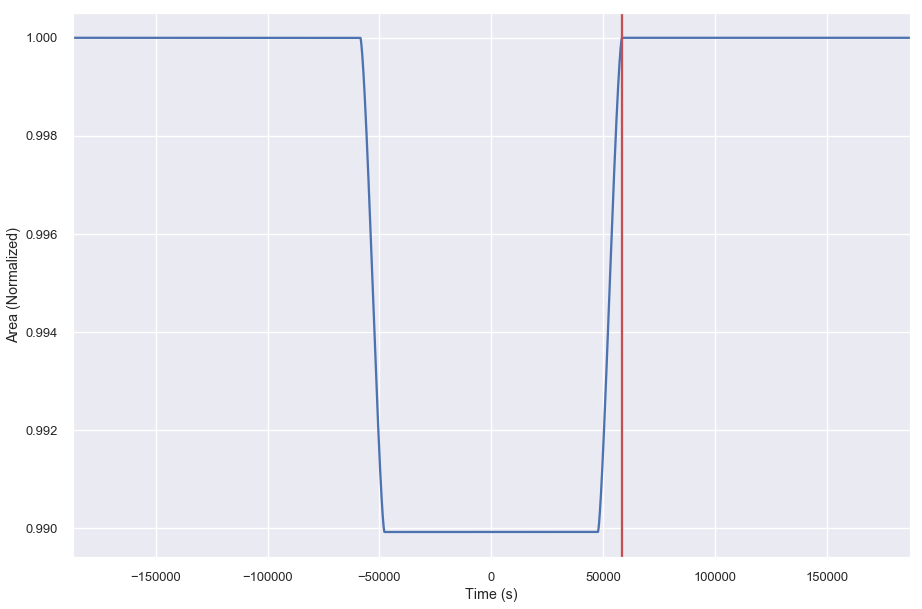

In [5]:
t = np.linspace(-10e-4*P/2,10e-4*P/2,50000)

def getarea(t):
    area = np.array([])
    for temp in t:
        area = np.append(area,intersectional_area(v,temp,R_s,R_p,b*R_s))
    return area

area = getarea(t)

def getflux(area):
    return np.pi*R_s**2-area

flux = getflux(area)
plt.figure(figsize=(15,10))
plt.plot(t,flux/np.max(flux));
plt.xlabel('Time (s)')

plt.xlim(-10e-4*P/2,10e-4*P/2)
plt.axvline(x=t_T/2,c='r')
plt.ylabel('Area (Normalized)')
plt.show()

## Limb Darkening: Different Variations $\left[\theta \in \left(-\frac{\pi}{2},\frac{\pi}{2}\right)\right]$

### 4 $ \frac{I(\theta)}{I(\theta\:=\:0)} $ curves with different number of parameters $u$: 
$$ \mu = \cos\theta\\
\text{Curve 1}: \\1- u_1\cdot(1-\mu)\\
\text{Curve 2}: \\1- u_1 \cdot (1 - \mu) - u_2 \cdot (1 - \mu)^2\\ 
\text{Curve 3}:\\1- u_1\cdot(1 - \mu) - u_2\cdot(1 - \mu^{1.5}) - u_3\cdot(1 - \mu^2)\\
\text{Curve 4}: \\1- u_1\cdot(1 - \mu^{0.5}) - u_2\cdot(1 - \mu) - u_3\cdot(1 - \mu^{1.5}) - u_4\cdot(1 - \mu^2)
$$

In [6]:
def ld_1param(theta, u = 0.5):
    mu = np.cos(theta)
    return 1 - u*(1-mu)


def ld_2param(theta, u1 = 0.25, u2 = 0.4):
    mu = np.cos(theta)
    return 1 - u1 * (1 - mu) - u2 * (1 - mu)**2


def ld_3param(theta, u1 = 0.25, u2 = 0.15, u3 = 0.10):
    mu = np.cos(theta)
    return 1 - u1*(1 - mu) - u2*(1 - mu**1.5) - u3*(1 - mu**2)


def ld_4param(theta, u1 = 0.30, u2 = 0.10, u3 = 0.07, u4 = 0.03):
    mu = np.cos(theta)
    return 1 - u1*(1 - mu**0.5) - u2*(1 - mu) - u3*(1 - mu**1.5) - u4*(1 - mu**2)


def ld_factor(theta,param=2,u = 0.5,u1 = 0.30, u2 = 0.10, u3 = 0.07, u4 = 0.03):
    if param==1:
        return ld_1param(theta,u = 0.5)
    elif param==2:
        return ld_2param(theta, u1 = 0.25, u2 = 0.4)
    elif param==3:
        return ld_3param(theta,u1 = 0.25, u2 = 0.15, u3 = 0.10)
    elif param==4:
        return ld_4param(theta,u1 = 0.30, u2 = 0.10, u3 = 0.07, u4 = 0.03)

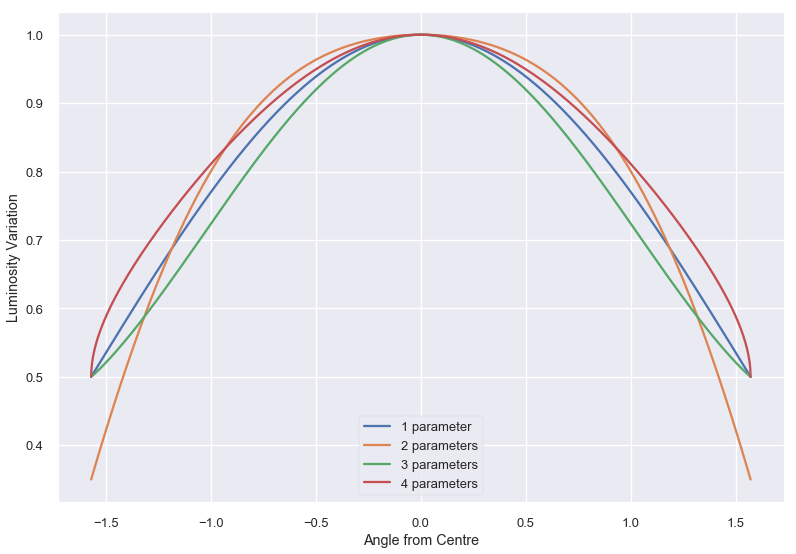

In [7]:
fig = plt.figure(figsize=(13,9))

angles = np.linspace(-np.pi/2,np.pi/2,2000)
plt.plot(angles,ld_1param(angles), label='1 parameter')
plt.plot(angles,ld_2param(angles),label='2 parameters')
plt.plot(angles,ld_3param(angles),label='3 parameters')
plt.plot(angles,ld_4param(angles),label='4 parameters')
plt.xlabel('Angle from Centre')
plt.ylabel('Luminosity Variation')
plt.legend(loc='lower center')
plt.show()

### Let's see how this varies in our simulation:

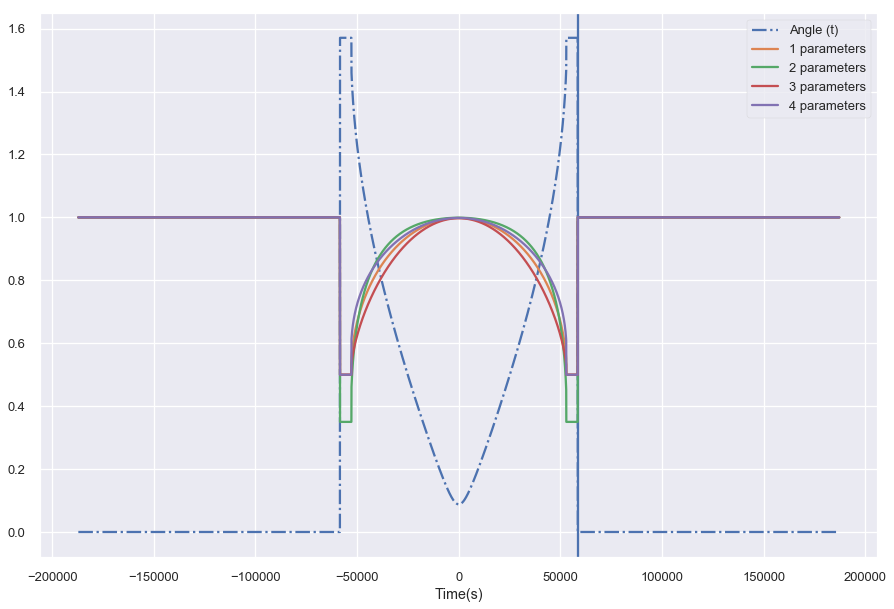

In [8]:
def gettheta(t):
    x = v*t
    d = np.sqrt(v**2*t**2+(b*R_s)**2) #projected distance of projection of planet of the star

    theta = np.zeros(len(t))

    theta[abs(t)<=t_F/2]=np.arcsin(d[abs(t)<=t_F/2]/R_s)
    theta[np.logical_and(abs(t)>t_F/2, abs(t)<=t_T/2)]=np.pi/2
    
    return theta

plt.figure(figsize=(15,10))
plt.plot(t,gettheta(t), linestyle='-.', label = 'Angle (t)')

plt.axvline(x=t_T/2)

plt.plot(t,ld_1param(gettheta(t)),label='1 parameters')
plt.plot(t,ld_2param(gettheta(t)),label='2 parameters')
plt.plot(t,ld_3param(gettheta(t)),label='3 parameters')
plt.plot(t,ld_4param(gettheta(t)),label='4 parameters')

plt.xlabel('Time(s)')
plt.legend()
plt.show()

### Take this limb darkening into our light curve:

$$ \text{Flux} \propto \text{Area} \\
\text{Corrected Flux Ratio} = \text{Limb Darkening Factor } \times \text{Flux Ratio}$$

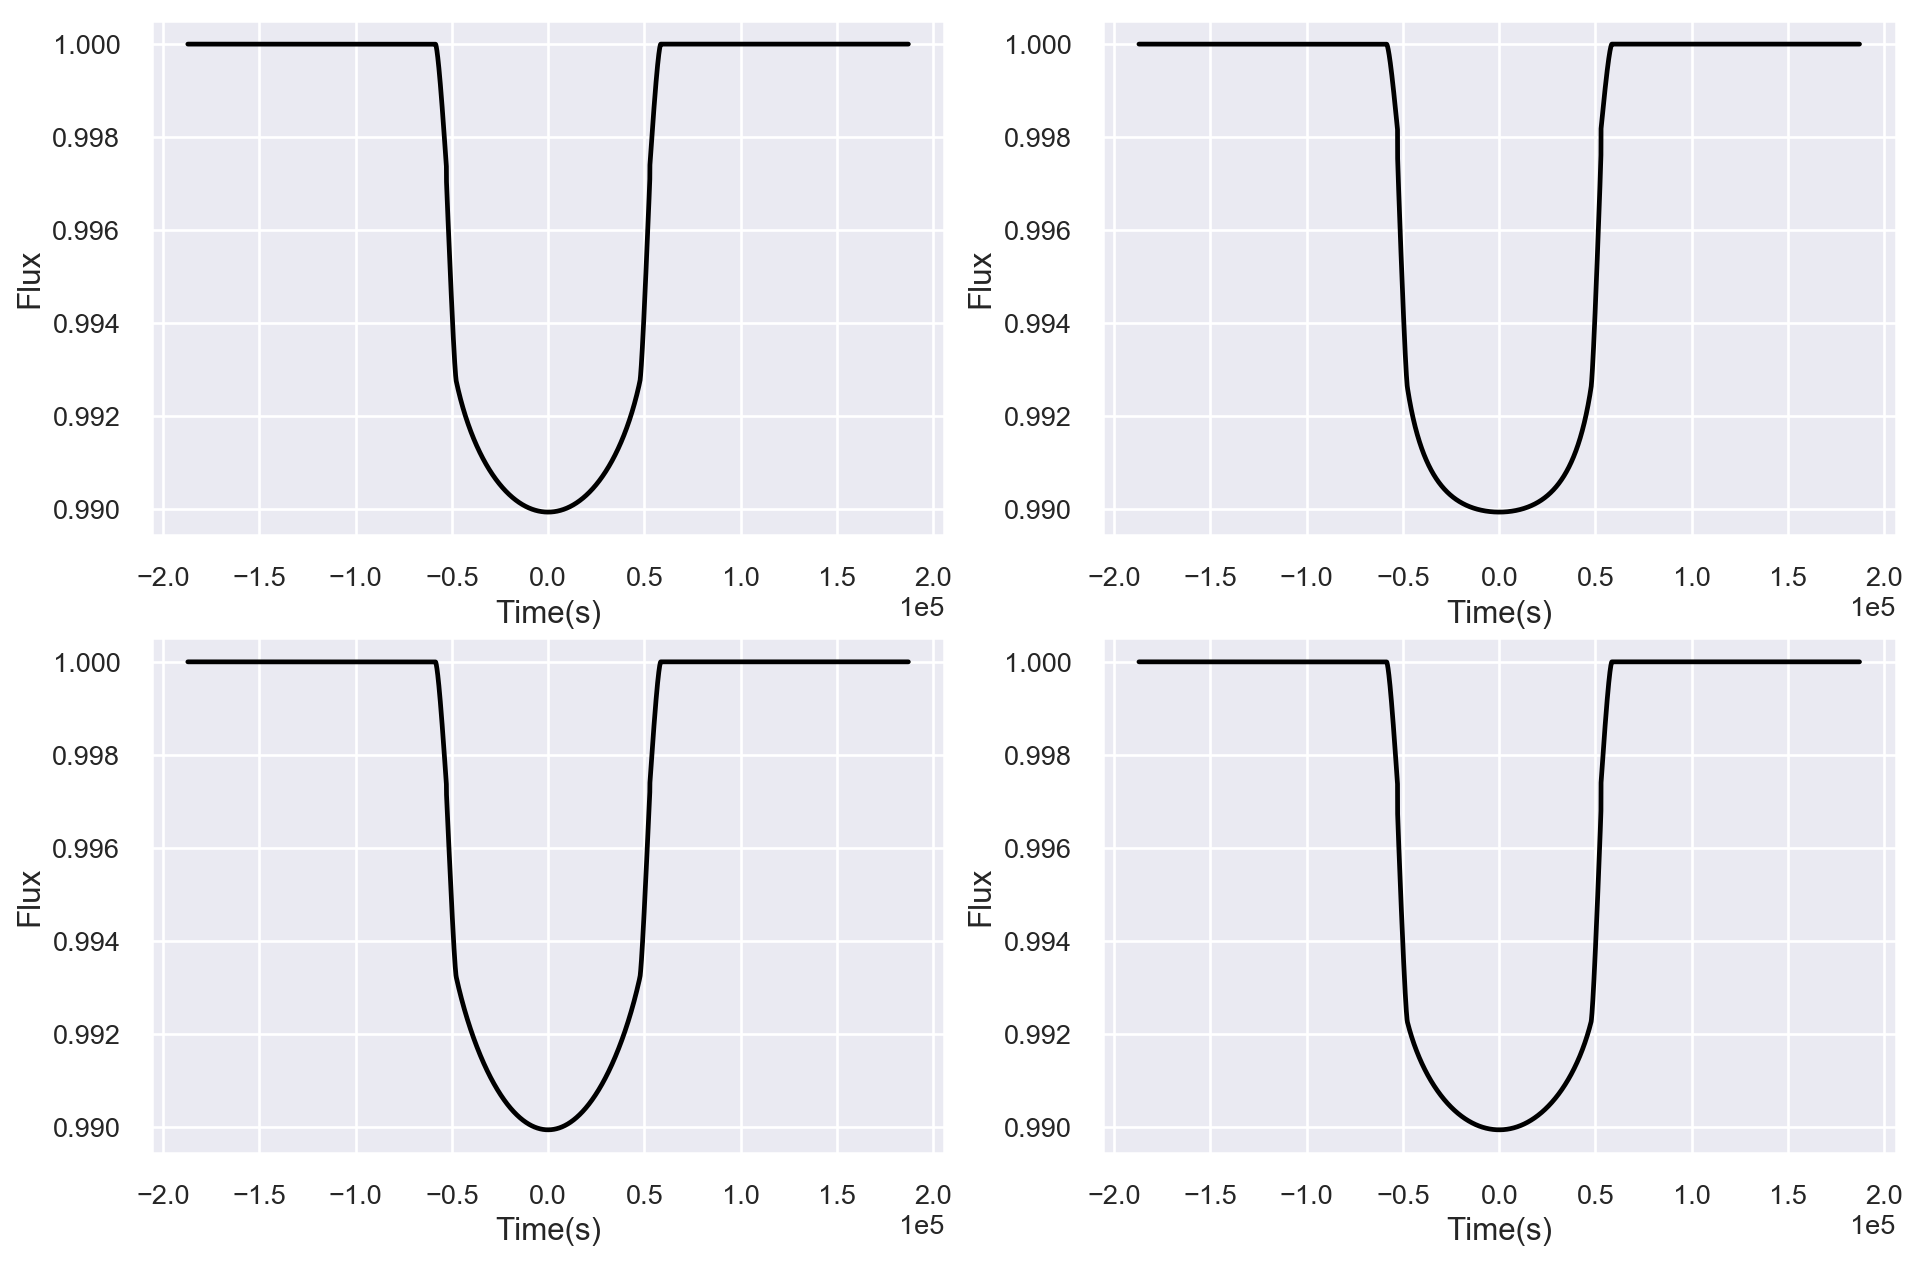

In [9]:
def getLDflux(t,param=2):
    return np.pi*R_s**2-getarea(t)*ld_factor(gettheta(t),param)


def formatter(ax):
    ax.set_ylabel('Flux',fontsize='15',fontweight='roman')
    ax.set_xlabel('Time(s)',fontsize='15',fontweight='roman')
    ax.ticklabel_format(style='scientific',axis='x',scilimits=(0,0))

finalfig = plt.figure(figsize=(15,10),dpi=150)

param1 = plt.subplot(221)
formatter(param1)
param1.plot(t,getLDflux(t,1)/(np.pi*R_s**2),c='black')

param2 = plt.subplot(222)
formatter(param2)
param2.plot(t,getLDflux(t,2)/(np.pi*R_s**2),c='black')

param3 = plt.subplot(223)
formatter(param3)
param3.plot(t,getLDflux(t,3)/(np.pi*R_s**2),c='black')

param4 = plt.subplot(224)
formatter(param4)
param4.plot(t,getLDflux(t,4)/(np.pi*R_s**2),c='black')

plt.show()

## Correct for exoplanet luminosities:

In [10]:
#Subscript: s = star, p = planet
G = 6.673e-11
R_s = 696340000 #parameter
M_s = 1.989e30 #parameter
a = 778000000000 #parameter
R_p = 69911000 #parameter
i = 0.99995*np.pi/2 #parameter- t_T and t_F exist only for i close to pi/2

b = a*np.cos(i)/R_s
delta = (R_p/R_s)**2

P = 2*np.pi*np.sqrt(a**3/(G*M_s)) #Kepler's Third Law
v = np.sqrt(G*M_s/a) #Orbital Velocity

#The following formulae have been taken from the thesis:
t_T = P/np.pi*np.arcsin(R_s*np.sqrt(np.abs((1+R_p/R_s)**2-b**2))/(a*np.sin(i)))
t_F = P/np.pi*np.arcsin(np.sin(np.pi*t_T/P)*np.sqrt(((1-R_p/R_s)-b**2)/((1+R_p/R_s)-b**2)))
tau = t_T - t_F
print(tau) #checking if inclination is valid (tau shouldn't be negative)

11291.15479246201


In [11]:
def planet_reflected(a, R_p, t, i=np.pi/2, alb=0.52):
    phi = (1 - np.sin(i)*np.cos(2*np.pi*(t)/P))/2
    return alb/4 * (R_p/a)**2 * phi #returns ratio wrt star's flux

def planet_emitted(R_p, a):
    return (R_p/(2*a))**2 #returns ratio wrt star's flux

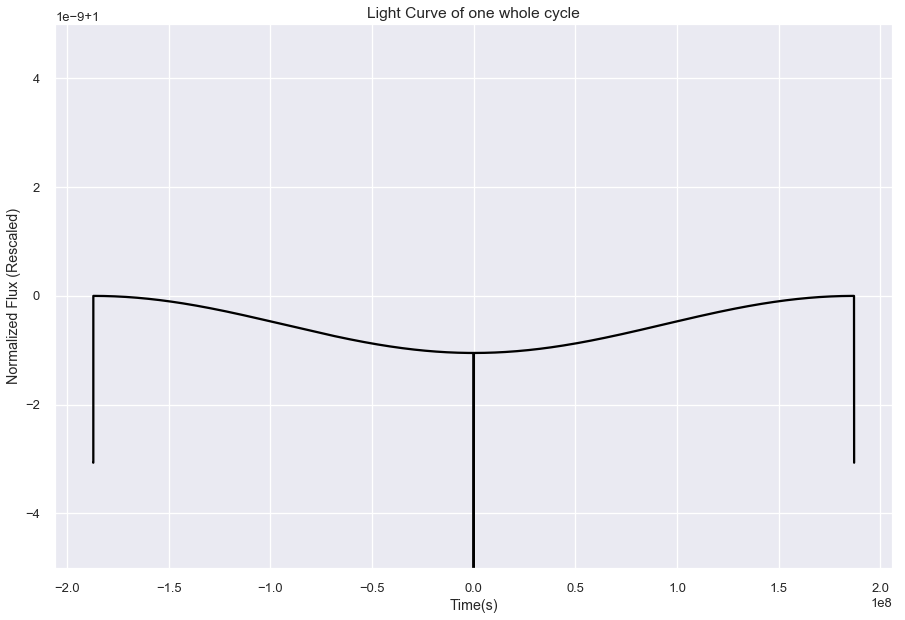

In [12]:
t = np.linspace(-P/2,P/2,90001) #Whole Cycle

reflected = np.pi*R_s**2 * planet_reflected(a,R_p,t,i) #Assuming no occultation
emitted = np.pi*R_s**2 * planet_emitted(R_p,a)

l = getLDflux(t)

ind1 = np.logical_and(t>0.5*(-P+t_T),t<0.5*(P-t_T))

ind2 = np.logical_and(t>0.5*(-P+t_F),t<0.5*(P-t_F))
ind3 = np.where(np.logical_and(np.invert(ind1),ind2))[0]

l[ind1]+=reflected[ind1]+emitted
l[ind3] += (emitted+reflected[ind3])*(np.pi*R_p**2-getarea(t)[ind3-len(t)//2])/(np.pi*R_p**2) #simply remove the area of the planet that's covered


#print((np.pi*R_p**2-getarea(t)[ind3-len(t)//2])/(np.pi*R_p**2))

plt.figure(figsize=(15,10))
plt.plot(t,l/l.max(),c='black')
plt.ylim(1-10e-9/2,1+10e-9/2)
plt.ylabel('Normalized Flux (Rescaled)')
plt.xlabel('Time(s)')
plt.title('Light Curve of one whole cycle')
plt.show()